In [23]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

# Combine the data into a single dataset

# Display the data table for preview


In [24]:
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)

df = pd.DataFrame.merge(ride,city, on = "city", how = "left")

df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [25]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure

city_type = df['type'].unique()
handle_list = []
cnt = 0


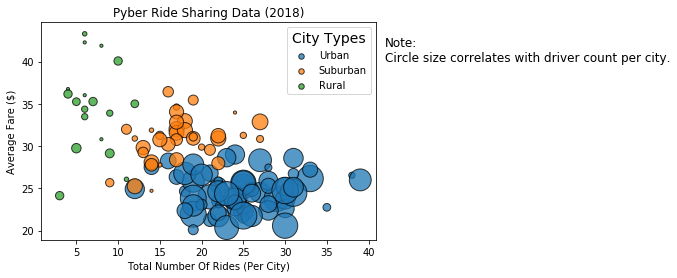

In [26]:
# Show plot
for i in city_type:
    type_df = df.loc[df['type']== i, ['city', 'ride_id', 'fare', 'driver_count']]
    total_rides = type_df.groupby(['city'])['ride_id'].count()
    avg_fare = type_df.groupby(['city'])['fare'].mean()
    sizes = type_df.groupby(['city'])['driver_count'].first()*10
    # Build the scatter plots for each city types
    handle = plt.scatter(total_rides, avg_fare, marker="o", color = 'C'+str(cnt),
                         edgecolors="black", s=sizes, alpha=0.75, label=i)
    handle_list.append(handle)
    cnt += 1
    
    lg = plt.legend(handles=handle_list, loc='best', title='City Types', fancybox=True,shadow=False)
lg.get_title().set_fontsize('14')

for i,_ in enumerate(handle_list):
    lg.legendHandles[i]._sizes = [30]
    
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlabel("Total Number Of Rides (Per City)")
plt.ylabel("Average Fare ($)")

plt.text(42, 40, 'Note:\nCircle size correlates with driver count per city.', fontsize=12)



    
plt.show()

## Total Fares by City Type

In [27]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


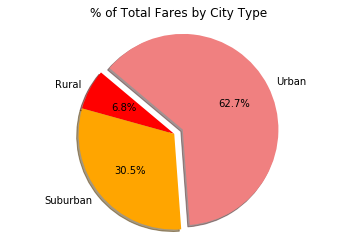

In [28]:
# Show Figure
total_fares = df.groupby('type')['fare'].sum()

explode = (0, 0, 0.1)

colors = ["red", "orange", "lightcoral"]

plt.pie(total_fares, explode=explode, labels=total_fares.keys(), autopct="%1.1f%%",
        colors= colors, shadow=True, startangle=140)
plt.title('% of Total Fares by City Type')

plt.axis("equal")

plt.show()

## Total Rides by City Type

In [29]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


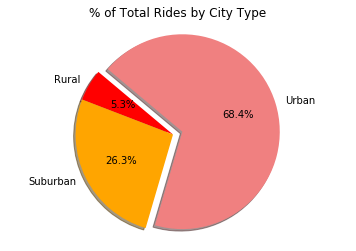

In [30]:
# Show Figure

total_rides = df.groupby('type')['ride_id'].count()
total_rides

explode = (0, 0, 0.1)


colors = ["red", "orange", "lightcoral"]

plt.pie(total_rides, explode=explode, labels=total_rides.keys(), autopct="%1.1f%%",
        colors= colors, shadow=True, startangle=140)
plt.title('% of Total Rides by City Type')

plt.axis("equal")

plt.show()

## Total Drivers by City Type

In [31]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


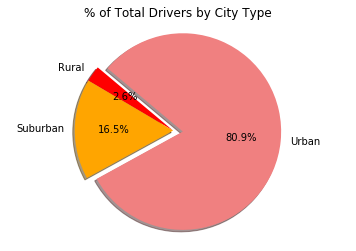

In [32]:
# Show Figure

total_driver_by_city = df.groupby(['type','city'])['driver_count'].first()
total_driver_by_city.reset_index()
total_drivers = total_driver_by_city.groupby('type').sum()

explode = (0, 0, 0.1)


colors = ["red", "orange", "lightcoral"]

plt.pie(total_drivers, explode=explode, labels=total_drivers.keys(), autopct="%1.1f%%",
        colors= colors, shadow=True, startangle=140)
plt.title('% of Total Drivers by City Type')

plt.axis("equal")


plt.show()
